# Running BayesOpt and making animations

In [2]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [3]:
import os
import numpy as np
import netCDF4 as nc
import xarray as xr
import datatree as dt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from sithom.plot import plot_defaults, label_subplots, lim
from tcpips.constants import DATA_PATH, FIGURE_PATH
from adforce.mesh import xr_loader

plot_defaults()

In [4]:
from sithom.io import read_json
file_name = os.path.join("..", "..", "exp", "bo_test16", "experiments.json")
exp_data = read_json(file_name)

In [5]:
key_ints = sorted([int(x) for x in exp_data.keys()])
res_list = []
curr_max_list = []
disp_list = []
ts_list = []
angle_list = []
curr_max = -np.inf
for key in key_ints:
    res =  exp_data[str(key)]["res"]
    curr_max = max(curr_max, res)
    res_list += [res]
    curr_max_list += [curr_max]
    disp_list += [exp_data[str(key)]["displacement"]]
    ts_list += [exp_data[str(key)]["trans_speed"]]
    angle_list += [exp_data[str(key)]["angle"]]

Text(0, 0.5, 'Height [m]')

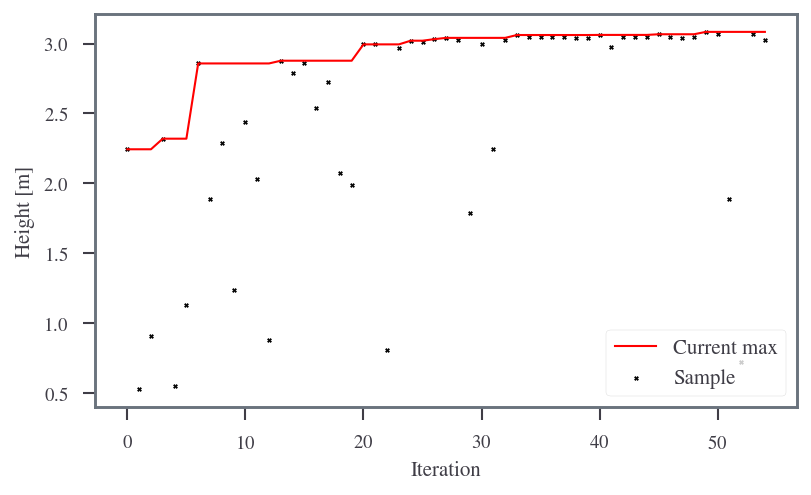

In [6]:
plt.scatter(key_ints, res_list, c="black", s=4.1, label="Sample")
plt.plot(key_ints, curr_max_list, label="Current max", color="red")
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Height [m]")

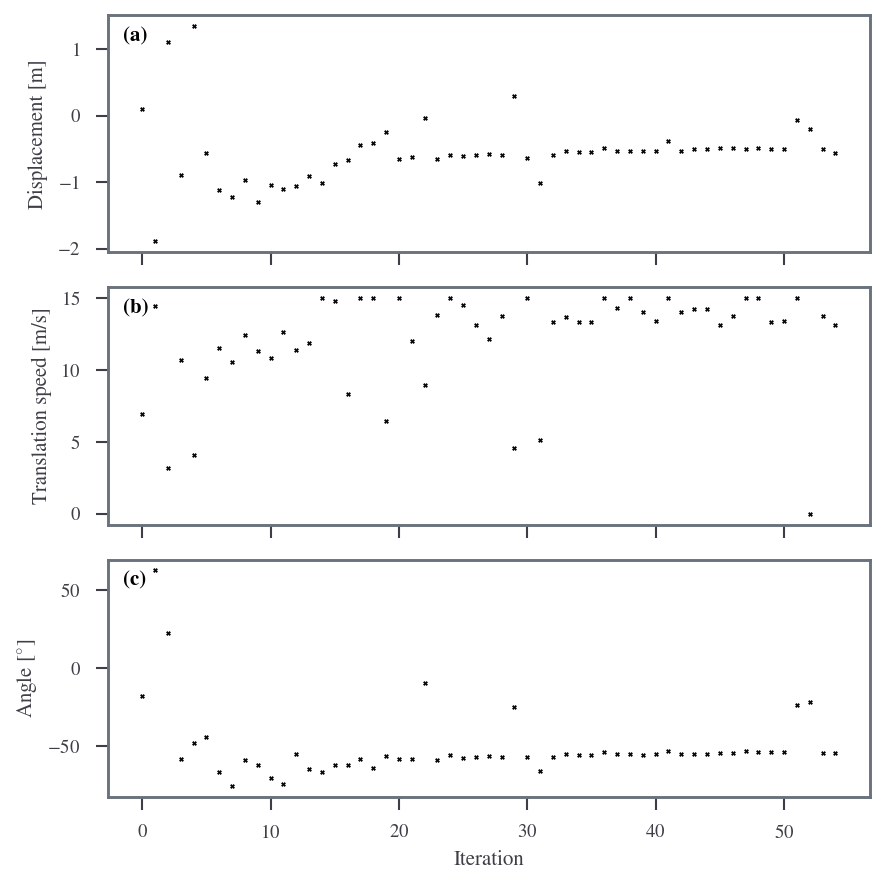

In [7]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(6, 6))
axs[0].scatter(key_ints, disp_list, c="black", s=4.1, label="Sample")
axs[1].scatter(key_ints, ts_list, c="black", s=4.1, label="Sample")
axs[2].scatter(key_ints, angle_list, c="black", s=4.1, label="Sample")
axs[0].set_ylabel("Displacement [m]")
axs[1].set_ylabel("Translation speed [m/s]")
axs[2].set_ylabel("Angle [$^{\circ}$]")
axs[2].set_xlabel("Iteration")
label_subplots(axs)

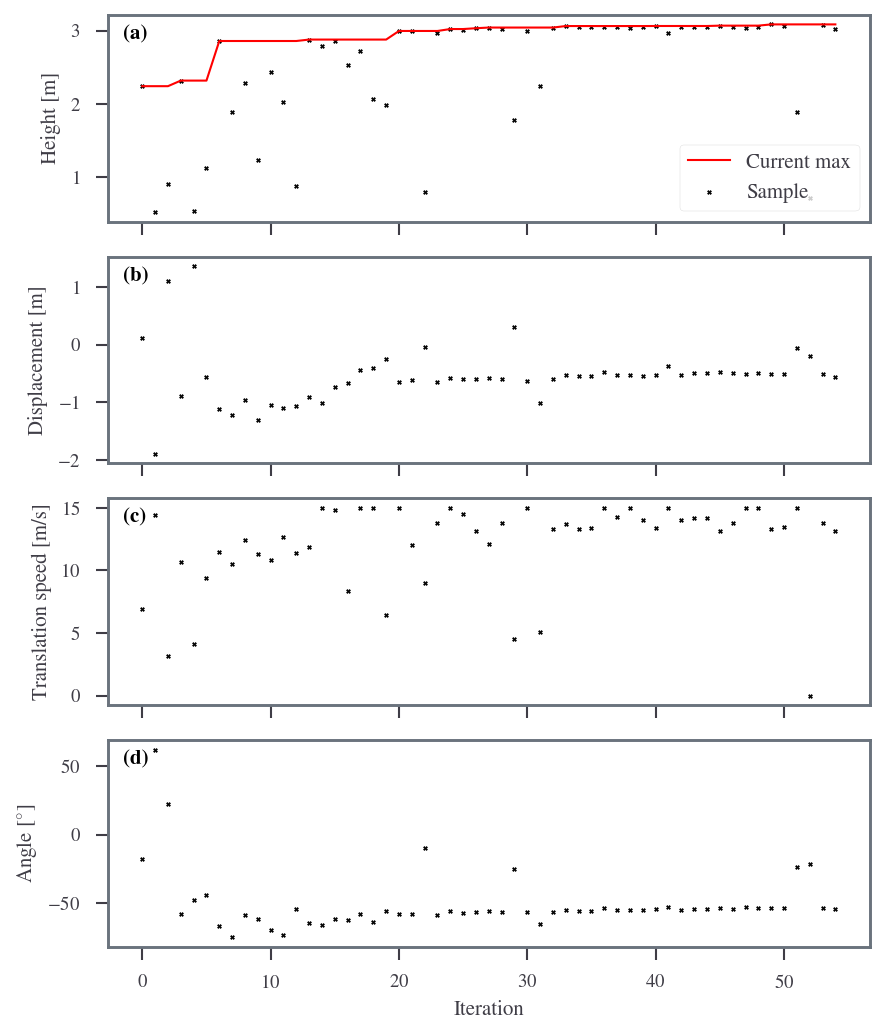

In [8]:
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(6, 7))

axs[0].scatter(key_ints, res_list, c="black", s=4.1, label="Sample")
axs[0].plot(key_ints, curr_max_list, label="Current max", color="red")
axs[0].legend()
axs[0].set_ylabel("Height [m]")
axs[1].scatter(key_ints, disp_list, c="black", s=4.1, label="Sample")
axs[2].scatter(key_ints, ts_list, c="black", s=4.1, label="Sample")
axs[3].scatter(key_ints, angle_list, c="black", s=4.1, label="Sample")
axs[1].set_ylabel("Displacement [m]")
axs[2].set_ylabel("Translation speed [m/s]")
axs[3].set_ylabel("Angle [$^{\circ}$]")
axs[3].set_xlabel("Iteration")
label_subplots(axs)

In [9]:
def plot_exp(
    file_name: str = os.path.join("..", "..", "exp", "bo_test16", "experiments.json")
) -> None:
    exp_data = read_json(file_name)
    key_ints = sorted([int(x) for x in exp_data.keys()])
    res_list = []
    curr_max_list = []
    disp_list = []
    ts_list = []
    angle_list = []
    curr_max = -np.inf
    for key in key_ints:
        res =  exp_data[str(key)]["res"]
        curr_max = max(curr_max, res)
        res_list += [res]
        curr_max_list += [curr_max]
        disp_list += [exp_data[str(key)]["displacement"]]
        ts_list += [exp_data[str(key)]["trans_speed"]]
        angle_list += [exp_data[str(key)]["angle"]]

    fig, axs = plt.subplots(4, 1, sharex=True, figsize=(6, 7))

    axs[0].scatter(key_ints, res_list, c="black", s=4.1, label="Sample")
    axs[0].plot(key_ints, curr_max_list, label="Current max", color="red")
    axs[0].legend()
    axs[0].set_ylabel("Height [m]")
    axs[1].scatter(key_ints, disp_list, c="black", s=4.1, label="Sample")
    axs[2].scatter(key_ints, ts_list, c="black", s=4.1, label="Sample")
    axs[3].scatter(key_ints, angle_list, c="black", s=4.1, label="Sample")
    axs[1].set_ylabel("Displacement [m]")
    axs[2].set_ylabel("Translation speed [m/s]")
    axs[3].set_ylabel("Angle [$^{\circ}$]")
    axs[3].set_xlabel("Iteration")
    label_subplots(axs)

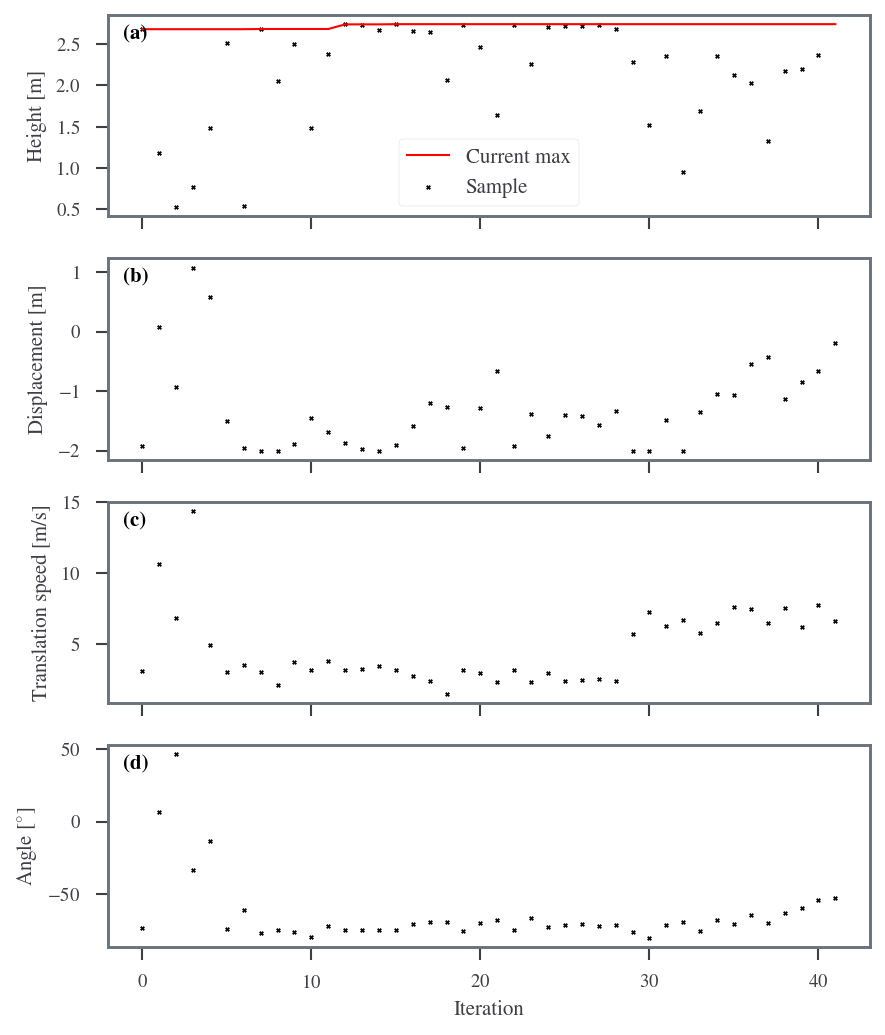

In [10]:
plot_exp(os.path.join("..", "..", "exp", "bo_test17", "experiments.json"))

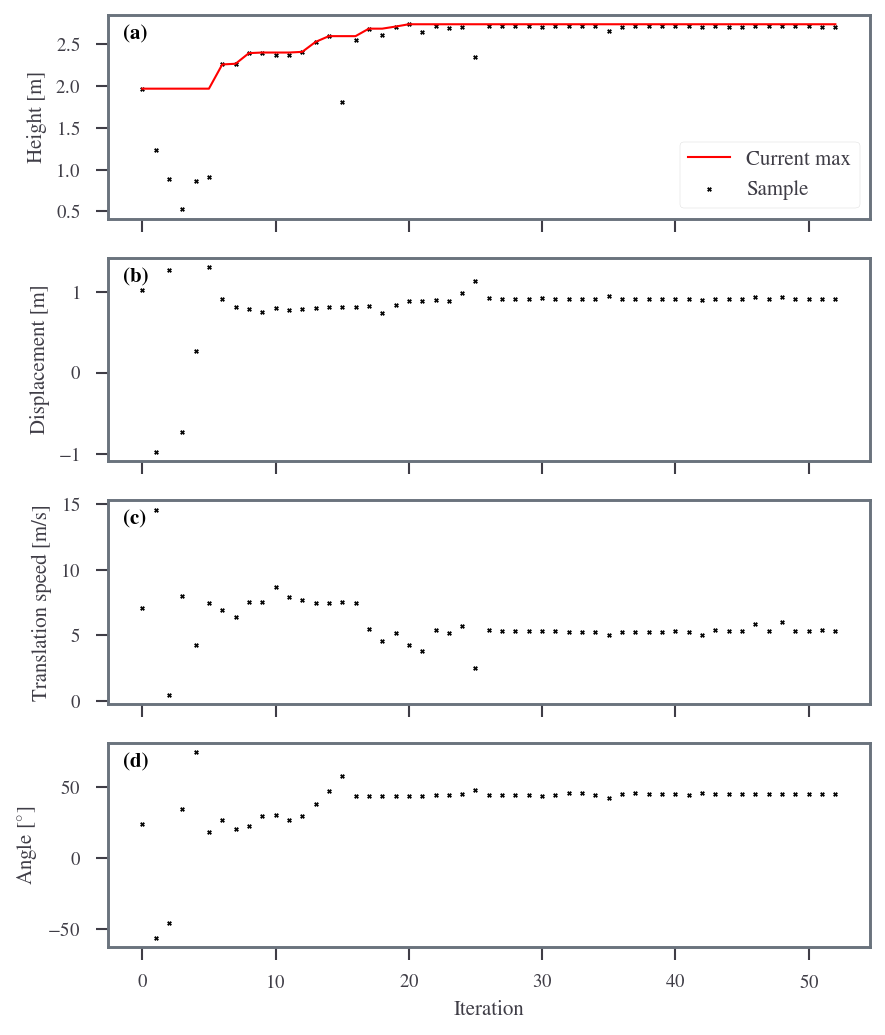

In [11]:
plot_exp(os.path.join("..", "..", "exp", "bo_test18", "experiments.json"))

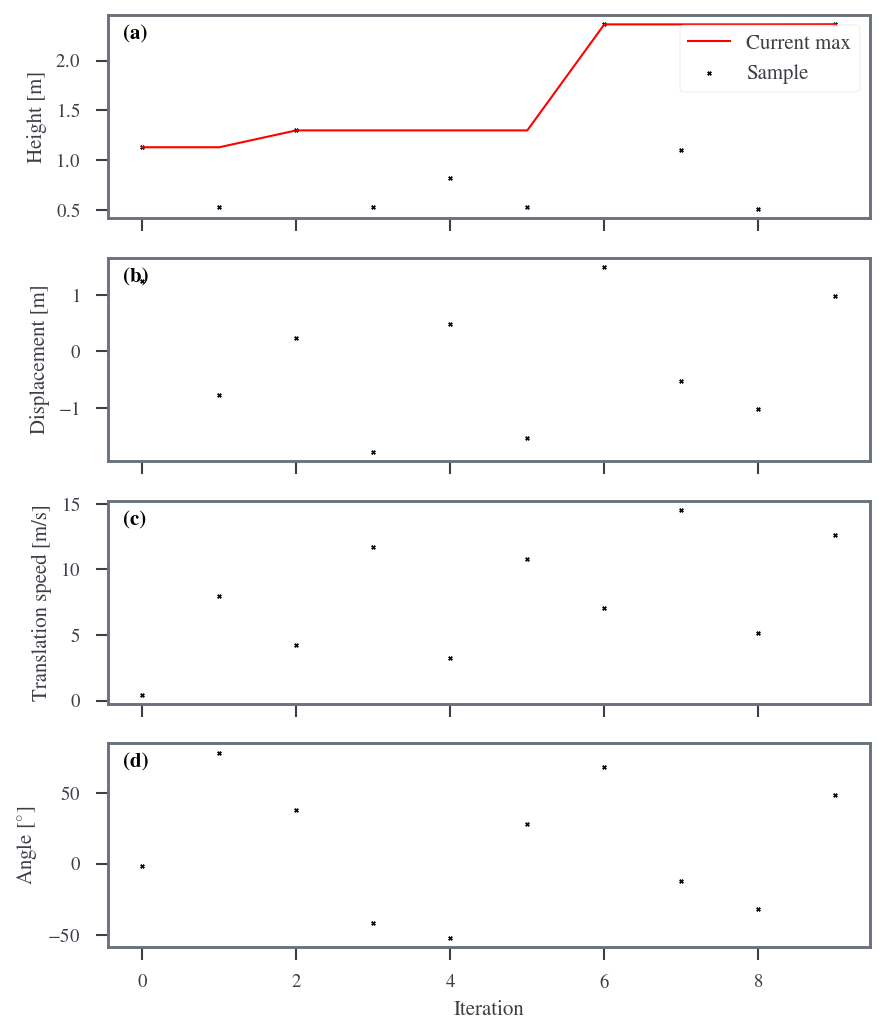

In [12]:
plot_exp(os.path.join("..", "..", "exp", "bo_test11", "experiments.json"))

In [13]:
ls

bo.ipynb    f22.ipynb  logs/       slurm-scripts/  tides.ipynb
comp.ipynb  f63.ipynb  mesh.ipynb  test.err        wrap.ipynb
core        img/       README.md   test.out


In [14]:
# has the tensorboard data got anything useful?
%load_ext tensorboard
%tensorboard --logdir ../logs/tensorboard/test15

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 7349.

In [15]:
import tensorboard as tb

In [16]:
os.listdir(os.path.join("..", "..", "exp"))

['bo_test2',
 'bo_test11',
 'testsuite',
 'angle_test',
 'bo_test18',
 'bo_test16',
 'test13',
 'trans_speed',
 'bo_test5',
 'bo_test7',
 'bo_test3',
 'bo_test6',
 'bo_test10',
 'bo_test',
 'displacment',
 'bo_test17',
 'bo_test8',
 'angle',
 'bo_test9',
 'test15',
 'test12']